# ML-assignment 3

## Part 0
* Hospital/bank/customer customer service - how many males/females are calling
* 

### Streaming
* Yes, with the proper data preprocessing it would be possible. We only need to extract the chosen features. We would probably have to extract only the last small part (maybe 1 second) the data in order to identify the gender of the person currently talking. However this would probably only work with one person talking at a time.

# Part 1


In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_url = "https://raw.githubusercontent.com/OnkelDunkel/MLAssignment2/master/voice.csv"
df = pd.read_csv(data_url)

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


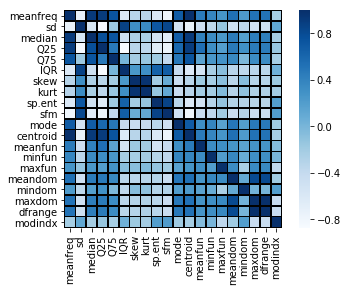

In [4]:
sns.heatmap(df.corr(),linewidths=0.50,vmax=1.0, square=True, cmap="Blues", linecolor='black')

### Do we see correlations in feature space?
* SD (standard deviation of frequency), IQR, skew, kurt, spectral entropy (sp.ent), sectral flatness (sfm) and modinx (modulation index) are statistical numbers. As seen in the correlation matrix they have little correlation with all other features in the dataset. This means that we might be able to remove those feature to increase performance and maybe achieve a better classification.

In [5]:
df.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [6]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [7]:
df.label = np.where(df.label.values == 'female', 1, 0)
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [8]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [9]:
#x = df.drop('label', axis = 1)
#y = df.label
#x = df.iloc[:,0:20]
#y = df.iloc[:,-1].va
#y= y.astype('float32')
#x= x.astype('int32')



In [10]:
y = df.label.values
x = df.drop(["label"], axis = 1)
x = (x - x.min())/(x.max() - x.min()) # normalization

In [20]:
x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380
5,0.441173,0.631448,0.432029,0.274076,0.722901,0.534679,0.051782,0.004773,0.922681,0.870197,0.401984,0.441173,0.299699,0.037761,0.857144,0.098448,0.006452,0.124375,0.124464,0.134238
6,0.526061,0.578887,0.595932,0.375003,0.706098,0.413441,0.040161,0.002997,0.940728,0.900382,0.307846,0.526061,0.276701,0.084682,0.929285,0.159942,0.006452,0.242673,0.242847,0.132985
7,0.572113,0.602659,0.532916,0.446359,0.819942,0.449670,0.036301,0.002064,0.906544,0.847309,0.458300,0.572113,0.205893,0.041084,0.233218,0.099505,0.006452,0.024303,0.024320,0.304531
8,0.485814,0.615573,0.509942,0.356014,0.718545,0.445258,0.027701,0.001531,0.953672,0.910746,0.782511,0.485814,0.226085,0.042110,0.834600,0.111416,0.006452,0.098642,0.098712,0.159026
9,0.448457,0.639632,0.441466,0.304920,0.689783,0.470487,0.030322,0.002079,0.972260,0.952323,0.041781,0.448457,0.276351,0.049021,0.904450,0.112734,0.023656,0.214439,0.214235,0.096442


In [12]:
import tensorflow as tf

In [13]:
all_features = []
for col in x.columns:
    all_features.append(tf.feature_column.numeric_column(col))
    
    
    

In [14]:
all_features

[NumericColumn(key='meanfreq', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sd', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='median', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Q25', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Q75', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='IQR', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='kurt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sp.ent', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sfm', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key

In [15]:
#all_classe = all_classe.append(tf.feature_column.numeric_column(x))
#all_classe = [tf.feature_column.numeric_column("y", shape=[1])]

all_classes = tf.feature_column.numeric_column(key="label",shape = 10)



    #all_features.append(tf.feature_column.numeric_column(col))
#all_classes =  df.label
#all_features 
#all_classes = all_classes.astype('float32')

In [16]:
all_classes

NumericColumn(key='label', shape=(10,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [17]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score


In [18]:
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=16, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(16, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation='sigmoid'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [19]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn =create_model, epochs = 100, verbose = 0)
#cv_scores = cross_val_score(estimator,all_features,all_classes, cv=10)
cv_scores = cross_val_score(estimator,x,y, cv=10)
cv_scores.mean()



Instructions for updating:
Colocations handled automatically by placer.


C:\Users\sarke\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: Input 'y' of 'Equal' Op has type float32 that does not match type int32 of argument 'x'.